# Tektite model 
* The tektite dataset is compositional 
    * Compositional data is a type of data where the relative proportions of different components are important, but absolutes are not. 
    
    
* Can imagine the tektite data as the result of some end-members (N,K) propagated through a design matrix 'X' of shape (N,D). The dot product of these two matrices will result in the Data shape (N,D). 
* N - Number of observations
* D - Dimensionality of the data (i.e., The number of major oxides)


# The Dataset
* The geochemistry dataset is a matrix of shape (465, 11) 
    * The number of observations is 465
    * The number of features is 11

# Model Steps 

1) Within Model Moves
<br>
    *  Change Mixture Matrix
<br>
    *  Update Hyper-parameters
<br>
    * Sample Components

2) Between Model Moves
<br>
    * Add Component
<br>
    * Delete Component
    
    

    

# Mathematics of Compositional Data

Y = $\zeta$X + $\epsilon$

* Components
    * (F,K) 
        * F - Features of the data
        * K - Number of components
        
* Mixture
    * (N,F) 
        * N - Number of Observations
        * F - Features of the Data

In [1]:
"""
Reproducibility
"""

import numpy as np

np.random.seed(42) # Hitchers Guide to the Galaxy

"""
Packages
"""

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

mpl.rcParams['font.size'] = 14

In [2]:
"""
The Data
- Read in Data
"""

geochem_data['sample_no'] = [i[1] for i in geochem_data['Sample'].str.split('_')]

"""
Preprocess
Necessary for machine learning
"""
#Getting features/variables of the dataframe:
features = ['K2O', 'CaO', 'TiO2', 
            'SiO2','Al2O3', 'Na2O',
            'MgO', 'FeO', 'MnO', 
            'Cl', 'SO3']

g_data = geochem_data[features].values

NameError: name 'geochem_data' is not defined

In [304]:
"""
Need Python packages
"""
import numpy 
import scipy.stats as stats

# Prior
* Define the prior distribution for the model parameters
    * For rjMCMC this usually involves defining prior distributions for the number of components in the data

# Likelihood
* The likelihood function should calculate the probability of the observed data given the model parameters

<br>

* For compositional data the likelihood is best to be defined as a multi-nomial distribution for each parameter

<br>

* We define the likelihood function as a Dirichlet-multinomial distribution and the prior as a Dirichlet distribution for the mixture weights and a Dirichlet distribution for the components. We then implement the rjMCMC algorithm to sample from the posterior distribution.

In [305]:
g_data_fix = np.zeros([465, 11])

for i in range(465):
    for j in range(11):
        g_data_fix[i,j] = g_data[i,j]
        if g_data[i,j] < 0 or g_data[i,j] == 0: 
            g_data_fix[i,j] = 1e-9

In [306]:
"""
Applying the Centered log-ratio (CLR) transformation
"""
data = g_data_fix/100
clr_data = np.log(data / np.mean(data, axis = 1)[:, np.newaxis])

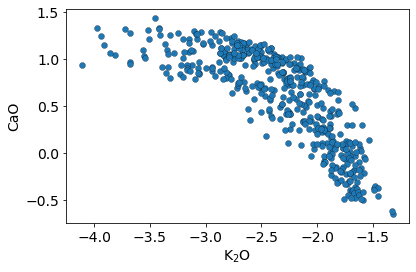

In [307]:
plt.plot(clr_data[:,0], clr_data[:,1], 'o', 
        markeredgecolor = 'k', markeredgewidth = 0.23)
plt.xlabel('K$_{2}$O')
plt.ylabel('CaO')
plt.tight_layout()


In [308]:
def Geo_Model(Mix, Components):
    """
    Function to forward model a 
    geochemistry dataset
    
    Returns
    -------
    (465, 11) compositional data array
    """
    
    Model = np.dot(Mix.T, Components)
    
    return Model 

In [309]:
def clr_transform(X): 
    """
    This function perform a centered log-ratio 
    transform on the dataset
    """
    clr_ = np.log(X/np.mean(X, axis = 1)[:, np.newaxis])
    
    return clr_

# Tektite Data

* Assumption is that each observed datapoint is some linear mixture of the end-members and a mixture matrix (everyting is under a sum-to-1 constraint)

* Want to estimate: 
<br>

    1) Number of End-members
    <br>

    2) Composition of End-members
   <br>

    3) Their mixture weights

In [310]:
geochem_data; 

In [311]:
clr_geo = clr_transform(g_data_fix)

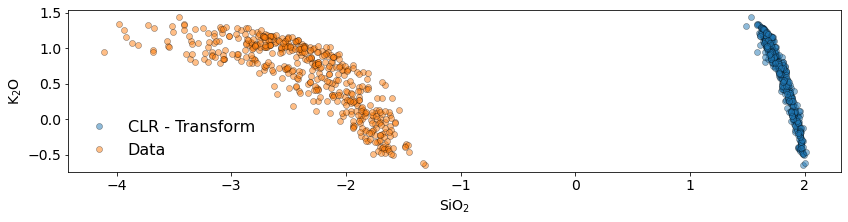

In [312]:
plt.figure(figsize= (12,3.3))

plt.plot(clr_geo[:,3], clr_geo[:,1], 'o', 
        markeredgewidth = 0.5, markeredgecolor = 'k', alpha = 0.5, 
        label = 'CLR - Transform')

plt.plot(clr_data[:,0], clr_data[:,1], 'o', 
        markeredgewidth = 0.5, markeredgecolor = 'k', alpha = 0.5, 
        label = 'Data')

plt.xlabel('SiO$_{2}$')
plt.ylabel('K$_{2}$O')
plt.legend(frameon = False, fontsize = 16)
plt.tight_layout()
plt.savefig('/Users/jackcarter/Desktop/Tektite Models/clr_fig.pdf')

In [313]:
"""
Prior on number of components 
"""
K = np.linspace(1, 15, 10).astype(int)

In [314]:
from scipy.stats import poisson, dirichlet

In [315]:
def log_Prior_K(K, mu_lambda):
    mu_lambda = 6
    return poisson.logpmf(K, mu_lambda)

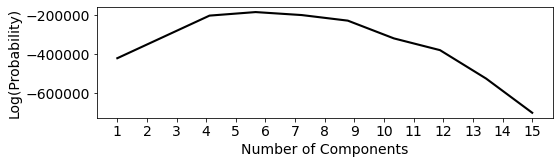

In [316]:
"""
Prior for the number of components
"""
plt.figure(figsize = (8, 2.5))
plt.plot(np.linspace(1, 15, 10), log_Prior_K(K, 5)*1e5, '-', 
            lw = 2.1, color = 'k')

plt.locator_params(axis = 'x', nbins = 30)
plt.xlabel('Number of Components')
plt.ylabel('Log(Probability)')
#plt.yscale('log')
plt.tight_layout()


In [317]:
Components_guess = np.random.dirichlet(np.ones(11), 11)

In [318]:
def jacobian_birth(K):
    return np.log(p_birth / (K_max - K))

def jacobian_death(K):
    return np.log(p_death / K)

In [319]:
p_birth = 0.1
p_death = 0.1
K_max = 15

<ipython-input-318-ea8dd99f97a5>:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(p_birth / (K_max - K))


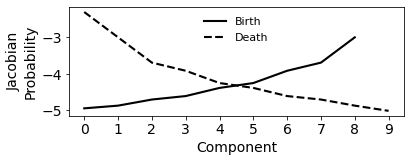

In [320]:
"""
Prior for the mixture weights
"""
plt.figure(figsize = (6, 2))
plt.plot(jacobian_birth(K), '-', 
            lw = 2.1, color = 'k', 
        label = 'Birth')

plt.plot(jacobian_death(K), '--', 
            lw = 2.1, color = 'k', 
        label = 'Death')

plt.locator_params(axis = 'x', nbins = 11)
plt.xlabel('Component')
plt.ylabel('Jacobian\nProbability')
plt.legend(frameon = False, fontsize = 11)

# The Bayesian Recipe
<br>
<br>
1) Prior, Likelihood, and Posterior
<br>
<br>
2) Acceptance Criteria
<br>
<br>
3) Proposal Function
<br>
    a) Between Model 
<br>
    b) Within Model


In [321]:
feature_labels = ['K$_{2}$O', 'CaO', 'TiO$_{2}$', 
            'SiO$_{2}$','Al$_{2}$O$_{3}$', 'Na$_{2}$O',
            'MgO', 'FeO', 'MnO', 
            'Cl', 'SO$_{3}$']

In [322]:
"""
The Component Dictionary
with a Mystery Component, X (random)
"""
feldspar_component = np.array([10, 0.5, 0, 65, 
                               18, 3, 0, 0, 
                               0, 0, 0])

feldspar_component /= feldspar_component.sum()

biotite_component = np.array([15, 0.5, 0, 40, 
                               18, 3, 1, 1, 
                               1, 0, 0])

biotite_component /= biotite_component.sum()

gypsum_component = np.array([0, 40, 0, 0, 
                             0, 0, 0, 0, 
                            0, 0, 60])

gypsum_component = gypsum_component/(gypsum_component.sum())

metamorphic_component = np.array([0, 14, 0, 51, 
                             11, 0, 20, 3, 
                            0, 0, 0])

metamorphic_component = metamorphic_component/(metamorphic_component.sum())

evaporite1_component = np.array([60, 0, 0, 0, 
                             0, 0, 0, 0, 
                            0, 40, 0])

evaporite1_component = evaporite1_component/(evaporite1_component.sum())

evaporite2_component = np.array([17, 0, 0, 0, 
                             0, 0, 15, 0, 
                            0, 38, 0])

evaporite2_component = evaporite2_component/(evaporite2_component.sum())

dolorite_component = np.array([0, 50, 0, 0, 
                             0, 0, 50, 0, 
                            0, 0, 0])

dolorite_component = dolorite_component/(dolorite_component.sum())

halite_component = np.array([0, 0, 0, 0, 
                             0, 50, 0, 0, 
                            0, 50, 0])

halite_component = halite_component/(halite_component.sum())

feature_labels = ['K$_{2}$O', 'CaO', 'TiO$_{2}$', 
            'SiO$_{2}$','Al$_{2}$O$_{3}$', 'Na$_{2}$O',
            'MgO', 'FeO', 'MnO', 
            'Cl', 'SO$_{3}$']

granitic_component = np.array([4, 4, 1, 70, 
                             10, 2, 1, 3, 
                            1, 0, 0])

granitic_component = granitic_component/(granitic_component.sum())


random_component = np.random.dirichlet(np.ones(11)).reshape(11)

random_component2 = np.random.dirichlet(np.random.uniform(1e-10, 0.8, 11)).reshape(11)

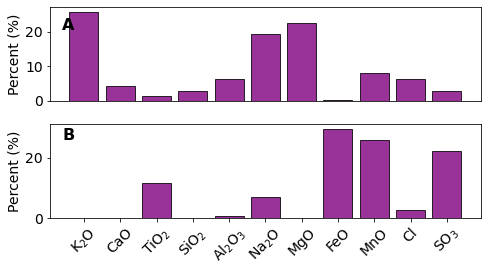

In [323]:
fig, ax = plt.subplots(2, 1, figsize = (7, 4))
ax[0].bar(np.linspace(1, 11, 11), 
              random_component*100,  
             edgecolor = 'k', lw = 1, 
             facecolor = 'purple', 
             alpha = 0.8)

ax[1].bar(np.linspace(1, 11, 11), 
              random_component2*100,  
             edgecolor = 'k', lw = 1, 
             facecolor = 'purple', 
             alpha = 0.8)
ax[1].set_ylabel('Percent (%)')
ax[0].set_ylabel('Percent (%)')

ax[0].set_xticks([])
ax[1].set_xticks(np.linspace(1, 11, 11))
ax[1].set_xticklabels(feature_labels, 
                            rotation = 45); 
ax[0].text(0.4, 20.4, 'A', fontweight = 'bold', fontsize = 16)
ax[1].text(0.4, 26, 'B', fontweight = 'bold', fontsize = 16)
plt.tight_layout()


In [324]:
"""
Concatenate the components
"""

component_dict = np.array([feldspar_component, 
                                gypsum_component, 
                           biotite_component,
                                metamorphic_component, 
                                dolorite_component, 
                           evaporite1_component, 
                           evaporite2_component,
                            granitic_component,
                           halite_component,
                                random_component, 
                          random_component2])

DICT = component_dict.shape[0]

In [325]:
def Geo_Model(Mix, Components):
    """
    Function to forward model a 
    geochemistry dataset
    
    Returns
    -------
    (465, 11) compositional data array
    """
    
    Model = np.dot(Mix.T, Components)
    
    return Model 

In [326]:
Mixture_Matrix_guess = np.random.dirichlet(np.ones(465), 5)

In [327]:
Components_guess = np.array([ dolorite_component, 
                             gypsum_component,
                             granitic_component,
                            feldspar_component,
                            random_component])

In [328]:
y = np.dot(Mixture_Matrix_guess.T, Components_guess)

In [329]:
clr_data = clr_transform(g_data_fix)

In [330]:
clr_model = clr_transform(y)

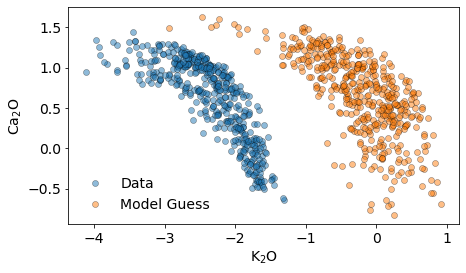

In [331]:
plt.figure(figsize = (7,4))
plt.plot(clr_data[:,0], clr_data[:,1], 'o', 
        markeredgewidth = 0.5, markeredgecolor = 'k', alpha = 0.5, 
        label = 'Data')

plt.plot(clr_model[:,0], clr_model[:,1], 'o',
        markeredgewidth = 0.5, markeredgecolor = 'k', alpha = 0.5,
         label = 'Model Guess')
plt.ylabel('Ca$_{2}$O')
plt.xlabel('K$_{2}$O')
#plt.xlim(-4.8, -1)
plt.legend(frameon = False)


In [332]:
"""
Likelihood
"""
def loglikelihood(data, components, mixture):
    """
    This funciton takes the data and model 
    performs a centred-log transform and 
    then calculates the likelihood of the data 
    given the model for a given number of components and 
    mixture matrix
    
    Returns
    -------
    
    Log-likelihood (Float)
    """
    
    clr_data = clr_transform(data)
    
    model = Geo_Model(mixture, components)
    
    clr_model = clr_transform(model)
    
    sigma = 0.05
    
    loglikelihood = norm.logpdf(clr_data, 
                               loc = clr_model, 
                               scale = sigma).sum()
    
    return loglikelihood
    

In [333]:
"""
Prior
"""
def logprior(components, mixture):
    """
    This function defines the prior 
    for the model parameters
    
    Returns
    -------
    
    LogPrior (float)
    """
    K = components.shape[0]
    """
    Number of components prior
    """
    lp = log_Prior_K(K, 6)
    """
    Components prior
    """

    return lp*1e5

In [334]:
"""
Posterior
"""
def logPosterior(data, components, mixture): 
    """
    This function calculates the posterior of 
    the model.
    
    log(likelihood) + log(Prior)
    
    Returns
    -------
    LogPosterior (Float)
    """
    
    LogLike = loglikelihood(data, components, mixture)
    LogPrior = logprior(components, mixture)
    
    return LogLike + LogPrior

In [335]:
def mixture_proposal(data, components, mixture):
    """
    This is a function for a between model move
    we suggest a new mixing matrix and then determine if this should be accepted
    """
    components_current = components
    mixture_current = mixture

    num_components = mixture.shape[1]
    K = num_components
    D = mixture.shape[0]
    N  = mixture.shape[1]
    
    """
    Select a mixing move
    --------------------
    
    1. Change 1 
    2. Change Some 
    3. Change all 
    """
    mixture_prime = np.copy(mixture)
    
    move_type = np.random.uniform()
    
    if move_type <  1/4: 
        i = np.random.choice(D)
        j = np.random.choice(N)
        
        mixture_prime[i,j] = abs(mixture_prime[i,j] + np.random.normal(0.1))
        
        mixture_prime /=mixture_prime.sum(axis = 0, 
                                     keepdims = True)
        
    elif 1/4 < move_type < 2/4:
        i = np.random.choice(D)
        j = np.random.choice(N, 10)
        
        mixture_prime[i,j] = abs(mixture_prime[i,j] + np.random.normal(0.1))
        
        mixture_prime /=mixture_prime.sum(axis = 0, 
                                     keepdims = True)
        
    elif 2/4 < move_type < 3/4: 
        i = np.random.choice(D)
        j = np.random.choice(N, 465)
        
        mixture_prime[i,j] = abs(mixture_prime[i,j] + np.random.normal(0.1))
        
        mixture_prime /=mixture_prime.sum(axis = 0, 
                                     keepdims = True)
        
    else: 
        i = np.random.choice(D)
        q = np.random.uniform(0, 1)
        mixture_prime[i,:] = abs(mixture_prime[i,:] + np.random.normal(0.1)*q)
        
        
        mixture_prime /=mixture_prime.sum(axis = 0, 
                                     keepdims = True)
        
    model_prime = Geo_Model(mixture_prime, components)
    
    model_current = Geo_Model(mixture, components)

    """
    Acceptance
    """
    current_posterior = logPosterior(data, 
                                     components_current, 
                                     mixture_current)
    
    proposed_posterior = logPosterior(data, 
                                     components, 
                                     mixture_prime)
    
    acceptance_criteria = min(1, 
            proposed_posterior - current_posterior)
    
    if np.log(np.random.uniform(0.85, 1)) < acceptance_criteria:
        mixture = mixture_prime
        components = components
        posterior = proposed_posterior
        model = model_prime
        
    else:
        mixture = mixture_current
        components = components_current
        posterior = current_posterior
        model = model_current
        
    return mixture, components, posterior, model

In [336]:
def component_proposal(data, components, mixture):
    """
    This function changes the composition of an  
    end-member
    
    Returns
    -------
    Mixture
    Components
    Posterior
    Model
    """
    components_current = components
    mixture_current = mixture
    K = components.shape[0]
    D = components.shape[1]
    
    """
    Lets select a feature to change
    """
    i = np.random.choice(K)
    j = np.random.choice(D)
    
    components_prime = np.copy(components)
    
    components_prime[i,j] = abs(components_prime[i,j] + np.random.normal(0, 0.005*components_prime[i,j]))
    
    components_prime[i,] /= components_prime[i,].sum(axis = 0)
    
    model_prime = Geo_Model(mixture, components_prime)
    
    model_current = Geo_Model(mixture, components)
    
    
    """
    Acceptance
    """
    current_posterior = logPosterior(data, 
                                     components_current, 
                                     mixture_current)
    
    proposed_posterior = logPosterior(data, 
                                     components_prime, 
                                     mixture)
    
    acceptance_criteria = min(1, 
            proposed_posterior - current_posterior)
    
    if np.log(np.random.uniform(0.85, 1)) < acceptance_criteria:
        mixture = mixture
        components = components_prime
        posterior = proposed_posterior
        model = model_prime
        
    else:
        mixture = mixture_current
        components = components_current
        posterior = current_posterior
        model = model_current
        
    return mixture, components, posterior, model
    

In [337]:
def component_swap(data, components, mixture):
    """
    This function suggests swapping the composition of an  
    end-member with no change in dimensionality
    
    Returns
    -------
    Mixture
    Components
    Posterior
    Model
    """
    components_current = components
    mixture_current = mixture
    K = components.shape[0]
    D = components.shape[1]
    
    """
    Lets select a component
    """
    i = np.random.choice(K)
    j = np.random.choice(DICT)
    
    components_prime = np.copy(components)
    
    components_prime[i,:] = component_dict[j,:]
        
    model_prime = Geo_Model(mixture, components_prime)
    
    model_current = Geo_Model(mixture, components)
    
    """
    Acceptance
    """
    current_posterior = logPosterior(data, 
                                     components_current, 
                                     mixture_current)
    
    proposed_posterior = logPosterior(data, 
                                     components_prime, 
                                     mixture)
    
    acceptance_criteria = min(1, 
            proposed_posterior - current_posterior)
    
    if np.log(np.random.uniform(0.85, 1)) < acceptance_criteria:
        mixture = mixture
        components = components_prime
        posterior = proposed_posterior
        model = model_prime
        
    else:
        mixture = mixture_current
        components = components_current
        posterior = current_posterior
        model = model_current
        
    return mixture, components, posterior, model
    

In [338]:
def mixture_swap(data, components, mixture):
    """
    This function suggest swapping a component 
    with another, keeping all other variables the same
    
    Returns
    -------
    Mixture
    Components
    Posterior
    Model
    """
    components_current = components
    mixture_current = mixture
    K = components.shape[0]
    D = components.shape[1]
    
    """
    Lets select a feature to change
    """
    i = np.random.choice(K)
    j = np.random.choice(D)
    
    mixture_prime = np.copy(mixture)
    

    i, j = np.random.choice(len(mixture_prime), 
                            size=2, 
                            replace=False)
    
    selection = np.random.uniform()
    
    if selection < 0.5: 
        
        mixture_prime[:,[i,j]] = mixture_prime[:,[j,i]]
    
    else: 
        mixture_prime[[i,j],:] = mixture_prime[[j,i],:]
    
    model_prime = Geo_Model(mixture_prime, components)
    
    model_current = Geo_Model(mixture, components)
    
    
    """
    Acceptance
    """
    current_posterior = logPosterior(data, 
                                     components_current, 
                                     mixture_current)
    
    proposed_posterior = logPosterior(data, 
                                     components, 
                                     mixture_prime)
    
    acceptance_criteria = min(1, 
            proposed_posterior - current_posterior)
    
    if np.log(np.random.uniform(0.85, 1)) < acceptance_criteria:
        mixture = mixture_prime
        components = components
        posterior = proposed_posterior
        model = model_prime
        
    else:
        mixture = mixture_current
        components = components_current
        posterior = current_posterior
        model = model_current
        
    return mixture, components, posterior, model
    

In [339]:
def component_birth(data, components, mixture): 
    """
    This function defines the birth proposal function
    
    Returns
    -------
    Mixture
    Components
    Posterior
    Model
    """
    components_current = components
    mixture_current = mixture
    K = components.shape[0]
    D = components.shape[1]
    N = mixture.shape[1]
    
    """
    New component 
     - Select from dictionary 
    """
    j = np.random.choice(DICT)
    component_new = component_dict[j].reshape(1,-1)
    """
    New Mixing vector
    """
    alpha2 = np.ones(N)
    mixing_new = np.random.dirichlet(alpha2, 1).reshape(1, N)
    
    """
    Add this into the component matrix
    and mixing matrix
    """
    mixture_prime = np.copy(mixture)
    
    components_prime = np.concatenate([components, component_new])
    
    mixture_prime = np.concatenate([mixture_prime, mixing_new],
                                  axis = 0)
    
    model_prime = Geo_Model(mixture_prime, components_prime)
    
    model_current = Geo_Model(mixture, components)
    
    
    """
    Acceptance
    """
    current_posterior = logPosterior(data, 
                                     components_current, 
                                     mixture_current)
    
    proposed_posterior = logPosterior(data, 
                                     components_prime, 
                                     mixture_prime)
    
    acceptance_criteria = min(1, 
            proposed_posterior - current_posterior)
    
    if np.log(np.random.uniform(0.85, 1)) < acceptance_criteria:
        mixture = mixture_prime
        components = components_prime
        posterior = proposed_posterior
        model = model_prime
        
    else:
        mixture = mixture_current
        components = components_current
        posterior = current_posterior
        model = model_current
        
    return mixture, components, posterior, model
    

In [340]:
def component_death(data, components, mixture): 
    """
    This function defines the death proposal function
    
    Returns
    -------
    Mixture
    Components
    Posterior
    Model
    """
    components_current = components
    mixture_current = mixture
    K = components.shape[0]
    D = components.shape[1]
    N = mixture.shape[0]
    """
    Select a component to delete
    """
    j = np.random.choice(K)
    """
    Add this into the component matrix
    and mixing matrix
    """
    components_prime = np.delete(components,j, axis = 0)
    mixture_prime = np.delete(mixture, j, axis = 0)
    
    mixture_prime /= mixture_prime.sum(axis = 0)
    
    model_prime = Geo_Model(mixture_prime, components_prime)
    
    model_current = Geo_Model(mixture, components)
    
    
    """
    Acceptance
    """
    current_posterior = logPosterior(data, 
                                     components_current, 
                                     mixture_current)
    
    proposed_posterior = logPosterior(data, 
                                     components_prime, 
                                     mixture_prime)
    
    acceptance_criteria = min(1, 
            proposed_posterior - current_posterior)
    
    if np.log(np.random.uniform(0.85, 1)) < acceptance_criteria:
        mixture = mixture_prime
        components = components_prime
        posterior = proposed_posterior
        model = model_prime
        
    else:
        mixture = mixture_current
        components = components_current
        posterior = current_posterior
        model = model_current
        
    return mixture, components, posterior, model
    

In [341]:
def component_merge(data, components, mixture): 
    """
    This function defines a merge proposal where the model selects
    two similar components and merges their compositions and mixture 
    weights. Dimensionality reduces by 1. 
    
    Returns
    -------
    Mixture
    Components
    Posterior
    Model
    """
    components_current = components
    mixture_current = mixture
    K = components.shape[0]
    D = components.shape[1]
    N = mixture.shape[1]
    """
    Find the closest components
    """
    distances = np.sum((components_current[:, np.newaxis] - components_current[np.newaxis, :])**2, axis=-1)
    np.fill_diagonal(distances, np.inf)
    i, j = np.unravel_index(np.argmin(distances), distances.shape)
    """
    Merge Components
    """
    components_merge = components[i] + components[j]
    components_merge /= components_merge.sum()
    components_merge = components_merge.reshape(1, 11)
    
    mixture_merge = mixture[i] + mixture[j]
    mixture_merge = mixture_merge.reshape(1, N)

    """
    Delete the components
    """
    mixture_delete = np.delete(mixture_current, [i,j], axis =0)
    components_delete = np.delete(components_current, [i,j], axis =0)
    """
    New Components and Mixture
    """
    components_prime = np.concatenate([components_delete, components_merge], axis = 0)
    mixture_prime = np.concatenate([mixture_delete, mixture_merge], axis = 0)

    mixture_prime /= mixture_prime.sum(axis = 0)
    model_prime = Geo_Model(mixture_prime, components_prime)
    
    model_current = Geo_Model(mixture, components)
    
    
    """
    Acceptance
    """
    current_posterior = logPosterior(data, 
                                     components_current, 
                                     mixture_current)
    
    proposed_posterior = logPosterior(data, 
                                     components_prime, 
                                     mixture_prime)
    
    acceptance_criteria = min(1, 
            proposed_posterior - current_posterior)
    
    if np.log(np.random.uniform(0.85, 1)) < acceptance_criteria:
        mixture = mixture_prime
        components = components_prime
        posterior = proposed_posterior
        model = model_prime
        
    else:
        mixture = mixture_current
        components = components_current
        posterior = current_posterior
        model = model_current
        
    return mixture, components, posterior, model
    

In [342]:
data = g_data_fix/100
sigma_data = np.zeros((465, 11))
for i in range(465):
    for j in range(11):
        sigma_data[i,j] = abs(np.random.normal(abs(clr_data[i,j]/100), abs(clr_data[i,j]/1000)))


In [343]:
"""
Full Model
"""
import pickle
def Tektite_rjMCMC(data, components, mixture, niters): 
    """
    Shapes
    """
    D = data.shape[1]
    N = data.shape[0]
    N2 = data.shape[1]
    K = components.shape[0]
    
    """
    Define arrays for storage of samples
    """
    max_components = 15
    
    num_components_storage = np.zeros(niters)
    
    posterior_storage = np.zeros(niters)
    
    components_storage = np.zeros((niters, max_components,D))
    
    mixture_storage = np.zeros((niters, max_components,N))
    
    model_storage = np.zeros((niters, N, N2))
    
    
    for i in range(niters):
        """
        Move choices
        """
        move_choice = np.random.uniform()
        
        if move_choice < 0.7: 
            selection = np.random.uniform()
            """
            Within Move
            """
            
            if selection < 0.25: 
            
                mixture, components, posterior, model = component_proposal(data,
                                                                       components,
                                                                        mixture)
            if 0.25 < selection < 0.5: 
            
                mixture, components, posterior, model = mixture_proposal(data, 
                                                                     components,
                                                                     mixture)
            if 0.5 < selection < 0.75: 

                mixture, components, posterior, model = mixture_swap(data, 
                                                                     components,
                                                                       mixture)
            if selection > 0.75:    
                mixture, components, posterior, model = component_swap(data, 
                                                                     components,
                                                                       mixture)
            
        """
        Between Model 
        """                                                                   
        if 0.7 < move_choice < 0.85 and K < max_components:
            """
            Birth
            """
            mixture, components, posterior, model = component_birth(data, 
                                                                    components,
                                                                    mixture)
             
        if move_choice > 0.85 and K > 2: 
            selection = np.random.uniform()
            
            if selection < 0.5: 
                """
                Death
                """
                mixture, components, posterior, model = component_death(data, 
                                                                        components, 
                                                                        mixture)
            if selection > 0.5: 
                
                """
                Merge
                """
                mixture, components, posterior, model = component_merge(data, 
                                                                        components, 
                                                                        mixture)
        K = components.shape[0]
        
        num_components_storage[i] = K
        posterior_storage[i] = posterior
        for j in range(K):
            for m in range(D):
                components_storage[i, j, m] = components[j,m]
        
        for j in range(K):
            for m in range(N):
                mixture_storage[i, j, m] = mixture[j,m]
                #mixture_storage
                
        model_storage[i,:,:] = model
        
        # Save every 10000th iteration
        if (i + 1) % 5000 == 0:
            with open(f'mixture_part_{i + 1}.pkl', 'wb') as f: 
                pickle.dump(mixture_storage[i,:,:], f)
                print(f"Save PICKLE mixture {i + 1} to mixture_part_{i + 1}.pkl")
            with open(f'component_part_{i + 1}.pkl', 'wb') as f: 
                pickle.dump(components_storage[i,:,:], f)
                print(f"Save PICKLE components {i + 1} to components_part_{i + 1}.pkl")
                print(f"Current number of components is", K)

    return num_components_storage, posterior_storage, components_storage, model_storage, mixture_storage
        

In [344]:
"""
Likelihood
"""
def loglikelihood(data, components, mixture):
    """
    This funciton takes the data and model 
    performs a centred-log transform and 
    then calculates the likelihood of the data 
    given the model for a given number of components and 
    mixture matrix
    
    Returns
    -------
    
    Log-likelihood (Float)
    """
    
    clr_data = clr_transform(data)
    
    model = Geo_Model(mixture, components)
    
    clr_model = clr_transform(model)
    
    
    loglikelihood = norm.logpdf(clr_data, 
                               loc = clr_model, 
                               scale = sigma_data).sum()
    
    return loglikelihood
    

In [345]:
"""
Pickle files
"""
import pickle
with open('mixture_part_50000.pkl', 'rb') as f: 
    mix_data = pickle.load(f)
    ';.'
with open('component_part_50000.pkl', 'rb') as f: 
    comp_data = pickle.load(f)

In [346]:
print(mix_data.shape) # check
print(comp_data.shape) # check

(15, 465)
(15, 11)


In [347]:
mix_data

array([[0.00067688, 0.00011096, 0.00190966, ..., 0.01493876, 0.02095072,
        0.02260827],
       [0.01146195, 0.01238158, 0.01368271, ..., 0.00070378, 0.00035322,
        0.00080986],
       [0.00918515, 0.01756776, 0.00738182, ..., 0.00332457, 0.00554966,
        0.02239315],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [348]:
"""
Reshape data to remove zeros
#"""
mix_data = np.delete(mix_data, 
                     [14, 13, 12, 11, 10],
                     axis = 0)
comp_data = np.delete(comp_data, 
                      [14, 13, 12, 11, 10],
                     axis = 0)

In [349]:
mix_data.shape[0]

10

In [350]:
mix_data

array([[6.76881990e-04, 1.10958158e-04, 1.90966392e-03, ...,
        1.49387648e-02, 2.09507167e-02, 2.26082654e-02],
       [1.14619522e-02, 1.23815809e-02, 1.36827129e-02, ...,
        7.03776263e-04, 3.53219737e-04, 8.09857300e-04],
       [9.18514530e-03, 1.75677582e-02, 7.38182420e-03, ...,
        3.32457441e-03, 5.54966056e-03, 2.23931489e-02],
       ...,
       [7.28884470e-03, 4.71885345e-03, 2.06795342e-02, ...,
        4.11301998e-02, 2.84236160e-02, 2.64291034e-03],
       [2.23928541e-02, 5.72244660e-02, 2.95311406e-02, ...,
        1.45305967e-03, 4.62265051e-03, 2.73790034e-02],
       [2.25826070e-01, 2.70406090e-01, 1.87034324e-01, ...,
        9.60905190e-02, 1.40797529e-01, 1.17216223e-01]])

In [ ]:
"""
Run again
"""
#a, b, c, d, e 
chains = {}
n_chains = 2
for chain_id in range(n_chains):
    np.random.seed()
    print(f"Running chain {chain_id + 1} of {n_chains}")
    chains[chain_id] = Tektite_rjMCMC(data,
                   comp_data, 
                   mix_data,
                   100000);

Running chain 1 of 2
Save PICKLE mixture 5000 to mixture_part_5000.pkl
Save PICKLE components 5000 to components_part_5000.pkl
Current number of components is 10
Save PICKLE mixture 10000 to mixture_part_10000.pkl
Save PICKLE components 10000 to components_part_10000.pkl
Current number of components is 10
Save PICKLE mixture 15000 to mixture_part_15000.pkl
Save PICKLE components 15000 to components_part_15000.pkl
Current number of components is 10
Save PICKLE mixture 20000 to mixture_part_20000.pkl
Save PICKLE components 20000 to components_part_20000.pkl
Current number of components is 10
Save PICKLE mixture 25000 to mixture_part_25000.pkl
Save PICKLE components 25000 to components_part_25000.pkl
Current number of components is 10
Save PICKLE mixture 30000 to mixture_part_30000.pkl
Save PICKLE components 30000 to components_part_30000.pkl
Current number of components is 10
Save PICKLE mixture 35000 to mixture_part_35000.pkl
Save PICKLE components 35000 to components_part_35000.pkl
Cur

In [ ]:
a, b, c, d, e = chains[0]
a2, b2, c2, d2, e2 = chains[1]
#a3, b3, c3, d3, e3 = chains[2]
#a4, b4, c4, d4, e4 = chains[3]
#a5, b5, c5, d5, e5 = chains[4]
#a6, b6, c6, d6, e6 = chains[5]

In [ ]:
unique_components, counts = np.unique(a, 
                    return_counts=True)


In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6,1.6))
# Create the bar plot
plt.bar(unique_components, counts, 
       edgecolor = 'k', 
       facecolor = 'purple', 
       alpha = 0.8, lw = 1.3)
plt.xlabel('Number of Components')
plt.ylabel('Frequency')
plt.xticks(unique_components)
plt.xlim(unique_components[0] - 3, 
         unique_components[0] + 3)
plt.show()

In [209]:
log_post = np.array([b, b2])#, b3, b4, b5 ,b6])

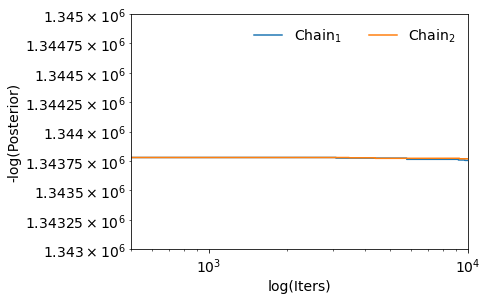

In [210]:
fig, ax = plt.subplots(1,1, figsize = (7,4.4))
# Create the bar plot
for i in range(2):
    plt.plot(-1*log_post[i], 
            label = f'Chain$_{i+1}$')

plt.xlabel('log(Iters)')
plt.ylabel('-log(Posterior)')
plt.yscale('log')
plt.xscale('log')
plt.xlim(500, 10000)
plt.ylim(1.343e6, 1.345e6)
plt.legend(ncol = 3, loc = 1, frameon = False)
plt.tight_layout()


In [211]:
"""
Need to 
select the 
number of 
components
"""

'\nNeed to \nselect the \nnumber of \ncomponents\n'

In [212]:
Components_ = c[-1000:]

In [213]:
K_m = counts

In [214]:
K_m = K_m.argmax() + 2

In [215]:
K_m = 10 # from plot

In [216]:
Components_mean = np.zeros([K_m, 11])

Components_std = np.zeros([K_m ,11])
for i in range(K_m):
    Components_mean[i, ], Components_std[i,] = Components_[:,i].mean(axis = 0), Components_[:,i].std(axis = 0)

In [217]:
"""
Overall weights for each component
"""
qq = e[-1].mean(axis = 1) 

qq = qq[:K_m]

"""
Sort Components
"""
sorted_indices = np.argsort(qq)[::-1]


Components_mean_sort = Components_mean[sorted_indices]
Components_std_sort = Components_std[sorted_indices]

In [218]:
Components_mean.shape

(10, 11)

In [219]:
feature_labels = ['K$_{2}$O', 'CaO', 'TiO$_{2}$', 
            'SiO$_{2}$','Al$_{2}$O$_{3}$', 'Na$_{2}$O',
            'MgO', 'FeO', 'MnO', 
            'Cl', 'SO$_{3}$']

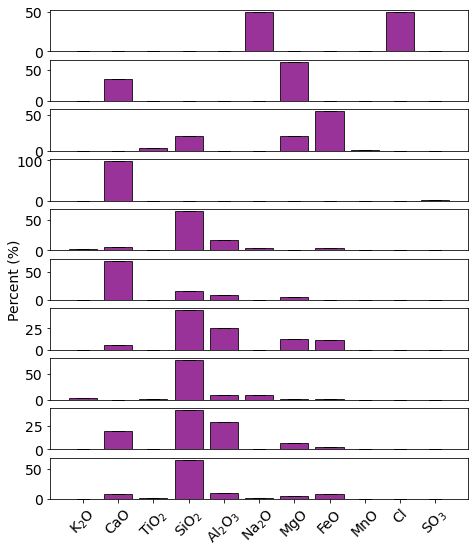

In [220]:
fig, ax  = plt.subplots(K_m, 1, 
            figsize = (0.75*K_m,0.9*K_m))
for i in range(K_m):
    ax[i].bar(np.linspace(1, 11, 11), 
              Components_mean[i]*100, 
              yerr = Components_std[i]*100, 
              capsize= 6, 
             edgecolor = 'k', lw = 1, 
             facecolor = 'purple', 
             alpha = 0.8)
    ax[np.round((K_m/2),0).astype(int)].set_ylabel('Percent (%)')
    ax[i].set_xticks([])
    ax[K_m-1].set_xticks(np.linspace(1, 11, 11))
    ax[K_m - 1].set_xticklabels(feature_labels, 
                                rotation = 45)

In [221]:
n = 1000
Model_ = d[-n:]

Model_mean = np.zeros((465, 11))
Model_std = np.zeros((465, 11))
for m in range(n):
    for i in range(465):
        for j in range(11):
            Model_mean[i,j] = Model_[m,i,j]
            Model_std[i,j] = Model_[m,i,j]

In [222]:
feature_labels = ['K$_{2}$O', 'CaO', 'TiO$_{2}$', 
            'SiO$_{2}$','Al$_{2}$O$_{3}$', 'Na$_{2}$O',
            'MgO', 'FeO', 'MnO', 
            'Cl', 'SO$_{3}$']

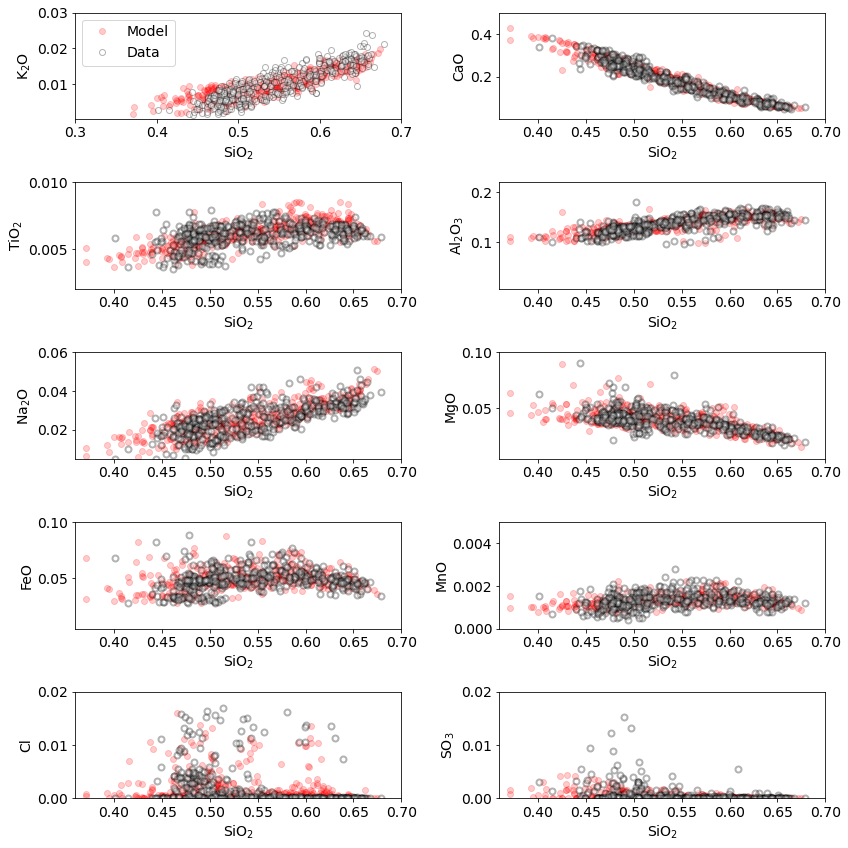

In [223]:
"""
Harker Diagrams
"""

fig, ax  = plt.subplots(5, 2, figsize = (12,12))

ax[0,0].plot(Model_mean[:,3],
            Model_mean[:,0], 
            'o', 
           alpha = 0.2, zorder = 0, 
           label = 'Model', 
                color = 'r')
ax[0,0].set_xlabel('SiO$_{2}$')
ax[0,0].set_ylabel('K$_{2}$O')
ax[0,0].set_xlim(0.3, 0.7)
ax[0,0].set_ylim(0.0002, 0.03)
ax[0,0].plot(data[:,3], data[:,0], 'o', alpha = 0.3, 
             markerfacecolor = 'w', markeredgewidth = 1, 
             markeredgecolor = 'k',
             label = 'Data')
ax[0,0].legend()

ax[0,1].plot(Model_mean[:,3],
            Model_mean[:,1], 
            'o', 
           alpha = 0.2, zorder = 0, 
           label = 'Model', 
                color = 'r')
ax[0,1].set_xlabel('SiO$_{2}$')
ax[0,1].set_ylabel('CaO')
ax[0,1].set_xlim(0.36, 0.7)
ax[0,1].set_ylim(0.0002, 0.5)
ax[0,1].plot(data[:,3], data[:,1], 'o', alpha = 0.3, 
             markerfacecolor = 'w', markeredgewidth = 2, 
             markeredgecolor = 'k',
             label = 'Data')


ax[1,0].plot(Model_mean[:,3],
            Model_mean[:,2], 
            'o', 
           alpha = 0.2, zorder = 0, 
           label = 'Model', 
                color = 'r')
ax[1,0].set_xlabel('SiO$_{2}$')
ax[1,0].set_ylabel('TiO$_{2}$')
ax[1,0].set_xlim(0.36, 0.7)
ax[1,0].set_ylim(0.002, 0.01)
ax[1,0].plot(data[:,3], data[:,2], 'o', alpha = 0.3, 
             markerfacecolor = 'w', markeredgewidth = 2, 
             markeredgecolor = 'k',
             label = 'Data')


ax[1,1].plot(Model_mean[:,3],
            Model_mean[:,4], 
            'o', 
           alpha = 0.2, zorder = 0, 
           label = 'Model', 
                color = 'r')
ax[1,1].set_xlabel('SiO$_{2}$')
ax[1,1].set_ylabel('Al$_{2}$O$_{3}$')
ax[1,1].set_xlim(0.36, 0.7)
ax[1,1].set_ylim(0.005, 0.22)
ax[1,1].plot(data[:,3], data[:,4], 'o', alpha = 0.3, 
             markerfacecolor = 'w', markeredgewidth = 2, 
             markeredgecolor = 'k',
             label = 'Data')


ax[2,0].plot(Model_mean[:,3],
            Model_mean[:,5], 
            'o', 
           alpha = 0.2, zorder = 0, 
           label = 'Model', 
                color = 'r')
ax[2,0].set_xlabel('SiO$_{2}$')
ax[2,0].set_ylabel('Na$_{2}$O')
ax[2,0].set_xlim(0.36, 0.7)
ax[2,0].set_ylim(0.005, 0.06)
ax[2,0].plot(data[:,3], data[:,5], 'o', alpha = 0.3, 
             markerfacecolor = 'w', markeredgewidth = 2, 
             markeredgecolor = 'k',
             label = 'Data')


ax[2,1].plot(Model_mean[:,3],
            Model_mean[:,6], 
            'o', 
           alpha = 0.2, zorder = 0, 
           label = 'Model', 
                color = 'r')
ax[2,1].set_xlabel('SiO$_{2}$')
ax[2,1].set_ylabel('MgO')
ax[2,1].set_xlim(0.36, 0.7)
ax[2,1].set_ylim(0.005, 0.1)
ax[2,1].plot(data[:,3], data[:,6], 'o', alpha = 0.3, 
             markerfacecolor = 'w', markeredgewidth = 2, 
             markeredgecolor = 'k',
             label = 'Data')


ax[3,0].plot(Model_mean[:,3],
            Model_mean[:,7], 
            'o', 
           alpha = 0.2, zorder = 0, 
           label = 'Model', 
                color = 'r')
ax[3,0].set_xlabel('SiO$_{2}$')
ax[3,0].set_ylabel('FeO')
ax[3,0].set_xlim(0.36, 0.7)
ax[3,0].set_ylim(0.005, 0.1)
ax[3,0].plot(data[:,3], data[:,7], 'o', alpha = 0.3, 
             markerfacecolor = 'w', markeredgewidth = 2, 
             markeredgecolor = 'k',
             label = 'Data')


ax[3,1].plot(Model_mean[:,3],
            Model_mean[:,8], 
            'o', 
           alpha = 0.2, zorder = 0, 
           label = 'Model', 
                color = 'r')
ax[3,1].set_xlabel('SiO$_{2}$')
ax[3,1].set_ylabel('MnO')
ax[3,1].set_xlim(0.36, 0.7)
ax[3,1].set_ylim(0, 0.005)
ax[3,1].plot(data[:,3], data[:,8], 'o', alpha = 0.3, 
             markerfacecolor = 'w', markeredgewidth = 2, 
             markeredgecolor = 'k',
             label = 'Data')



ax[4,0].plot(Model_mean[:,3],
            Model_mean[:,9], 
            'o', 
           alpha = 0.2, zorder = 0, 
           label = 'Model', 
                color = 'r')
ax[4,0].set_xlabel('SiO$_{2}$')
ax[4,0].set_ylabel('Cl')
ax[4,0].set_xlim(0.36, 0.7)
ax[4,0].set_ylim(0, 0.02)
ax[4,0].plot(data[:,3], data[:,9], 'o', alpha = 0.3, 
             markerfacecolor = 'w', markeredgewidth = 2, 
             markeredgecolor = 'k',
             label = 'Data')


ax[4,1].plot(Model_mean[:,3],
            Model_mean[:,10], 
            'o', 
           alpha = 0.2, zorder = 0, 
           label = 'Model', 
                color = 'r')
ax[4,1].set_xlabel('SiO$_{2}$')
ax[4,1].set_ylabel('SO$_{3}$')
ax[4,1].set_xlim(0.36, 0.7)
ax[4,1].set_ylim(0, 0.02)


ax[4,1].plot(data[:,3], data[:,10], 'o', alpha = 0.3, 
             markerfacecolor = 'w', markeredgewidth = 2, 
             markeredgecolor = 'k',
             label = 'Data')



plt.tight_layout()



In [224]:
"""
Mixture weights
"""
weights_low, weights_high = np.percentile(e[-1000:], 
                                         [50 - 34, 
                                         50 + 34], 
                                         axis = 0)

In [225]:
"""
Normalized overall weights
"""
#norm_weights = weights_mean / np.sum(weights_mean); 

norm_weights_low = weights_low/np.sum(weights_low); 

norm_weights_high = weights_high/np.sum(weights_high); 

In [226]:
"""
Mixture weights
"""
weights_low, weights_high = np.percentile(e[-2000:], 
                                         [2.5,
                                         97.5], 
                                         axis = 0)

In [227]:
low_w = weights_low.mean(axis = 1)
high_w = weights_high.mean(axis = 1)

In [228]:
err = high_w - low_w

In [229]:
"""
Overall weights for each component
"""
qq = e[-1].mean(axis = 1) 
qq_err = e[-1].std(axis = 1)

In [230]:
"""
Sort Components
"""
sorted_indices = np.argsort(qq)[::-1]

In [231]:
qq_err_low, qq_err_high = np.percentile(e[-1], 
                      [2.5, 97.5], 
                      axis = 1)

qq_err_low2, qq_err_high2 = np.percentile(e[-1], 
                      [50 - 34, 50 + 34], 
                      axis = 1)

In [232]:
print(qq[sorted_indices]*100)

[43.16128448 26.10331562 15.59304315  4.48168428  3.28716793  3.28214517
  2.1043452   0.99862326  0.63628388  0.35210703  0.          0.
  0.          0.          0.        ]


In [233]:
print(np.round(qq_err_low2[sorted_indices]*100, 3))

[2.5420e+01 1.8666e+01 1.4710e+00 9.8700e-01 7.6000e-02 2.0000e-01
 6.8000e-02 1.2100e-01 1.0300e-01 1.6000e-02 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00]


In [234]:
print(qq_err_high2[sorted_indices]*100)

[62.65890843 32.82597611 29.14035163  8.07365106  7.25856999  7.20917816
  3.98210119  1.90647542  1.14618804  0.6209435   0.          0.
  0.          0.          0.        ]


In [235]:
print(qq_err_high2[sorted_indices]*100 - qq[sorted_indices]*100) 

[19.49762396  6.72266049 13.54730848  3.59196678  3.97140206  3.92703299
  1.87775598  0.90785216  0.50990416  0.26883648  0.          0.
  0.          0.          0.        ]


In [236]:
print(qq[sorted_indices]*100 - qq_err_low2[sorted_indices]*100)

[17.74089454  7.43769079 14.12162424  3.49493042  3.2115187   3.08240797
  2.03604591  0.87800913  0.5337415   0.33637692  0.          0.
  0.          0.          0.        ]


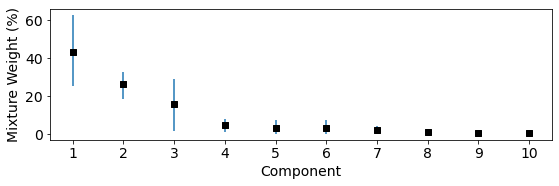

In [237]:
fig, ax = plt.subplots(1, 1, figsize = (9, 2.4))
for i in range(K_m): 
    plt.vlines(i + 1, (qq_err_low2[sorted_indices][i]*100), 
               (qq_err_high2[sorted_indices][i]*100), 
              label = '95% Confidence Interval', 
              lw = 1.5)
    
    plt.scatter(i +1, qq[sorted_indices][i]*100, marker = 's', 
               color = 'k', 
               s = 40, zorder = 100, 
               label = 'Mean')
plt.locator_params(axis = 'x', nbins= 11)
plt.xlabel('Component')
#plt.yscale('log')
plt.ylabel('Mixture Weight (%)')


Text(0, 0.5, '($\\sigma_{\\rm K}$/K)')

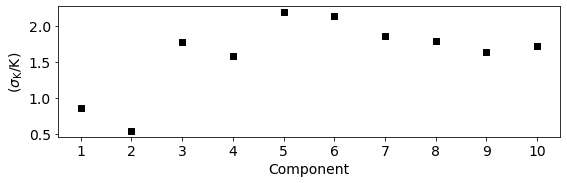

In [238]:
fig, ax = plt.subplots(1, 1, figsize = (9, 2.4))
for i in range(K_m): 

    
    plt.scatter(i +1, (qq_err_high2[sorted_indices][i] - qq_err_low2[sorted_indices][i])/qq[sorted_indices][i], marker = 's', 
               color = 'k', 
               s = 40, zorder = 100, 
               label = 'Mean')
plt.locator_params(axis = 'x', nbins= 11)
plt.xlabel('Component')
#plt.yscale('log')
plt.ylabel(r'($\sigma_{\rm K}$/K)')

In [239]:
qq

array([0.00352107, 0.00636284, 0.00998623, 0.02104345, 0.43161284,
       0.15593043, 0.04481684, 0.03287168, 0.03282145, 0.26103316,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [240]:
"""
Pie
"""

qq /= qq.sum(axis = 0)
y = qq[sorted_indices]
y_err = qq_err[sorted_indices]
y1 = y[0] + y[1] + y[3] +y[4] + y[5]
y2 = y[2]
y3 = y[6]
y4 = y[7]
y5 = y[8]
y6 = y[9]

y_pie = np.array([y1, y2, y3, y4, y5, y6])
tektite_labels = ['Granitoid Basement', 'Limestone', 
                 'Anhydrite/Gypsum', 
                 'Fe-rich Mafic', 
                 'Dolomite', 
                 'Halite']
myexplode = [0.01, 0.03, 0.2, 0.5, 1, 1.4]

my_colors = ['#af8dc3', '#f1a340', '#7fbf7b',
                  '#f781bf', '#a65628', '#a1d76a']

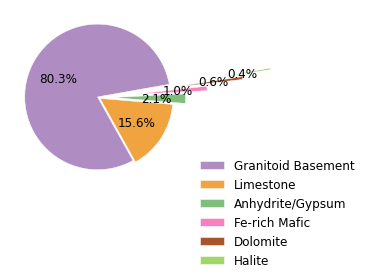

In [241]:
plt.pie(y_pie, 
        labels = tektite_labels,
       startangle = 10, 
       explode = myexplode, 
       autopct = '%1.1f%%',
       wedgeprops={'linewidth': 0.5, 'edgecolor': 'w'},
       textprops={'size': 12}, 
       labeldistance = None, 
        colors=my_colors); 

plt.legend(fontsize = 12, frameon = False, 
          bbox_to_anchor = (1,0.22))

plt.tight_layout()


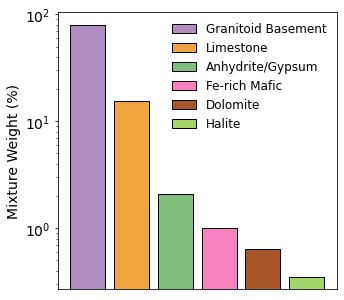

In [242]:
fig, ax = plt.subplots(1,1, figsize = (5, 4.4))
for i in range(len(y_pie)):
    ax.bar(i, y_pie[i]*100, 
      color = my_colors[i], edgecolor = 'k', 
      label = tektite_labels[i])
    
plt.legend(frameon = False, fontsize= 12)
plt.ylabel('Mixture Weight (%)')
plt.xticks([]); 
plt.yscale('log'); 
plt.tight_layout()


In [243]:
qq = qq[:K_m]

In [244]:
qq /= qq.sum(axis = 0)

In [245]:
qq_err[:K_m]

array([0.00561648, 0.00644496, 0.01092838, 0.0370932 , 0.1691485 ,
       0.12453211, 0.03796175, 0.04837478, 0.03820978, 0.07362291])

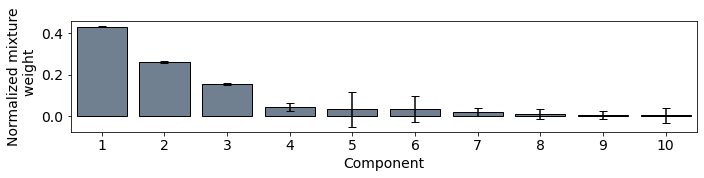

In [246]:
fig, ax = plt.subplots(1, 1, figsize = (10, 2.5))
plt.bar(np.arange(K_m) + 1,  height = y[:K_m],  
       edgecolor = 'k', yerr = qq_err[:K_m]/2, 
       capsize = 4, facecolor = 'slategrey')
plt.xlabel('Component'); 
plt.ylabel('Normalized mixture\n  weight'); 
plt.locator_params(axis = 'x', nbins = K_m + 1)
plt.xlim(0.5, K_m + 0.5)
#plt.yscale('log')
plt.tight_layout()


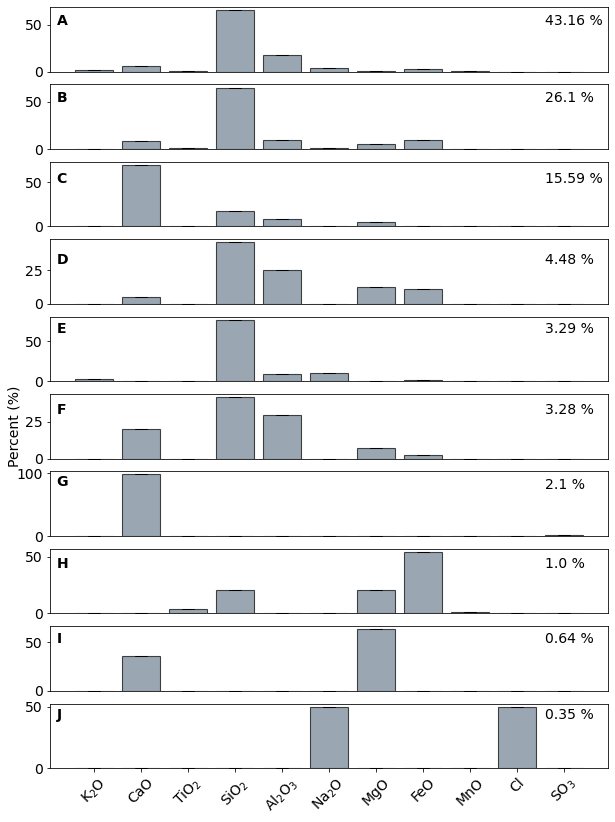

In [247]:
fig, ax  = plt.subplots(K_m, 1, 
            figsize = (1*K_m,1.4*K_m))
for i in range(K_m):
    ax[i].bar(np.linspace(1, 11, 11), 
              Components_mean_sort[i]*100, 
              yerr = Components_std_sort[i]*100, 
              capsize= 6, 
             edgecolor = 'k', lw = 1.1, 
             facecolor = 'slategrey', 
             alpha = 0.7)
    ax[np.round(K_m/2, 0).astype(int)].set_ylabel('Percent (%)')
    ax[i].set_xticks([])
    ax[K_m-1].set_xticks(np.linspace(1, 11, 11))
    ax[K_m - 1].set_xticklabels(feature_labels, 
                                rotation = 45)
ax[0].text(0.2, 50, 'A', fontweight = 'bold')
ax[1].text(0.2, 50, 'B', fontweight = 'bold')
ax[2].text(0.2, 50, 'C', fontweight = 'bold')
ax[3].text(0.2, 30, 'D', fontweight = 'bold')
ax[4].text(0.2, 60, 'E', fontweight = 'bold')
ax[5].text(0.2, 30, 'F', fontweight = 'bold')
ax[6].text(0.2, 80, 'G', fontweight = 'bold')
ax[7].text(0.2, 40, 'H', fontweight = 'bold')
ax[8].text(0.2, 50, 'I', fontweight = 'bold')
ax[9].text(0.2, 40, 'J', fontweight = 'bold')

ax[0].text(10.6, 50,  f'{np.round(y[0]*100, 2)} %')
ax[1].text(10.6, 50,  f'{np.round(y[1]*100, 2)} %')
ax[2].text(10.6, 50,  f'{np.round(y[2]*100, 2)} %')
ax[3].text(10.6, 30,  f'{np.round(y[3]*100, 2)} %')
ax[4].text(10.6, 60,  f'{np.round(y[4]*100, 2)} %')
ax[5].text(10.6, 30,  f'{np.round(y[5]*100, 2)} %')
ax[6].text(10.6, 75,  f'{np.round(y[6]*100, 2)} %')
ax[7].text(10.6, 40,  f'{np.round(y[7]*100, 2)} %')
ax[8].text(10.6, 50,  f'{np.round(y[8]*100, 2)} %')
ax[9].text(10.6, 40,  f'{np.round(y[9]*100, 2)} %')





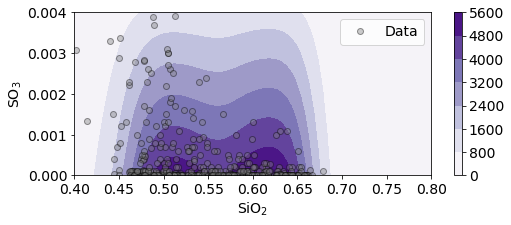

In [248]:
"""
2D contour plot
"""
import scipy.stats as st
# Peform the kernel density estimate
x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)

# Mesh Grid
xx, yy = np.meshgrid(x, y)
positions = np.vstack([xx.ravel(), yy.ravel()])

values = np.vstack([Model_mean[:,3], Model_mean[:,10]])

kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize = (8,3))
ax = fig.gca()

cfset = ax.contourf(xx, yy, f, cmap = 'Purples')
# Contour plot
#cset = ax.contour(xx, yy, f, colors='w')
# Label plot
#ax.clabel(cset, inline=1, fontsize=8)
ax.set_xlabel('SiO$_{2}$')
ax.set_ylabel('SO$_{3}$')
ax.set_xlim(0.4, 0.8)
ax.set_ylim(0, 0.004)
ax.plot(data[:,3], data[:,10], 'o', alpha = 0.4, markerfacecolor = 'grey',
        markeredgecolor = 'k',
       label = 'Data')
fig.colorbar(cfset)
ax.legend()

In [249]:
"""
2D contour plot
"""
import scipy.stats as st
# Peform the kernel density estimate
x = np.linspace(0, 1, 500)
y = np.linspace(0, 1, 500)

# Mesh Grid
xx, yy = np.meshgrid(x, y)
positions = np.vstack([xx.ravel(), yy.ravel()])

values_k2O = np.vstack([Model_mean[:,3], Model_mean[:,0]])

kernel_k2O = st.gaussian_kde(values_k2O)
f_k2O = np.reshape(kernel_k2O(positions).T, xx.shape)

values_caO = np.vstack([Model_mean[:,3], Model_mean[:,1]])

kernel_caO = st.gaussian_kde(values_caO)
f_caO = np.reshape(kernel_caO(positions).T, xx.shape)


values_tiO = np.vstack([Model_mean[:,3], Model_mean[:,2]])

kernel_tiO = st.gaussian_kde(values_tiO)
f_tiO = np.reshape(kernel_tiO(positions).T, xx.shape)

values_alO = np.vstack([Model_mean[:,3], Model_mean[:,4]])

kernel_alO = st.gaussian_kde(values_alO)
f_alO = np.reshape(kernel_alO(positions).T, xx.shape)

values_naO = np.vstack([Model_mean[:,3], Model_mean[:,5]])

kernel_naO = st.gaussian_kde(values_naO)
f_naO = np.reshape(kernel_naO(positions).T, xx.shape)

values_mgO = np.vstack([Model_mean[:,3], Model_mean[:,6]])

kernel_mgO = st.gaussian_kde(values_mgO)
f_mgO = np.reshape(kernel_mgO(positions).T, xx.shape)


values_feO = np.vstack([Model_mean[:,3], Model_mean[:,7]])

kernel_feO = st.gaussian_kde(values_feO)
f_feO = np.reshape(kernel_feO(positions).T, xx.shape)


values_mnO = np.vstack([Model_mean[:,3], Model_mean[:,8]])

kernel_mnO = st.gaussian_kde(values_mnO)
f_mnO = np.reshape(kernel_mnO(positions).T, xx.shape)

values_cl = np.vstack([Model_mean[:,3], Model_mean[:,9]])

kernel_cl = st.gaussian_kde(values_cl)
f_cl = np.reshape(kernel_cl(positions).T, xx.shape)


values_sO = np.vstack([Model_mean[:,3], Model_mean[:,10]])

kernel_sO = st.gaussian_kde(values_sO)
f_sO = np.reshape(kernel_sO(positions).T, xx.shape)




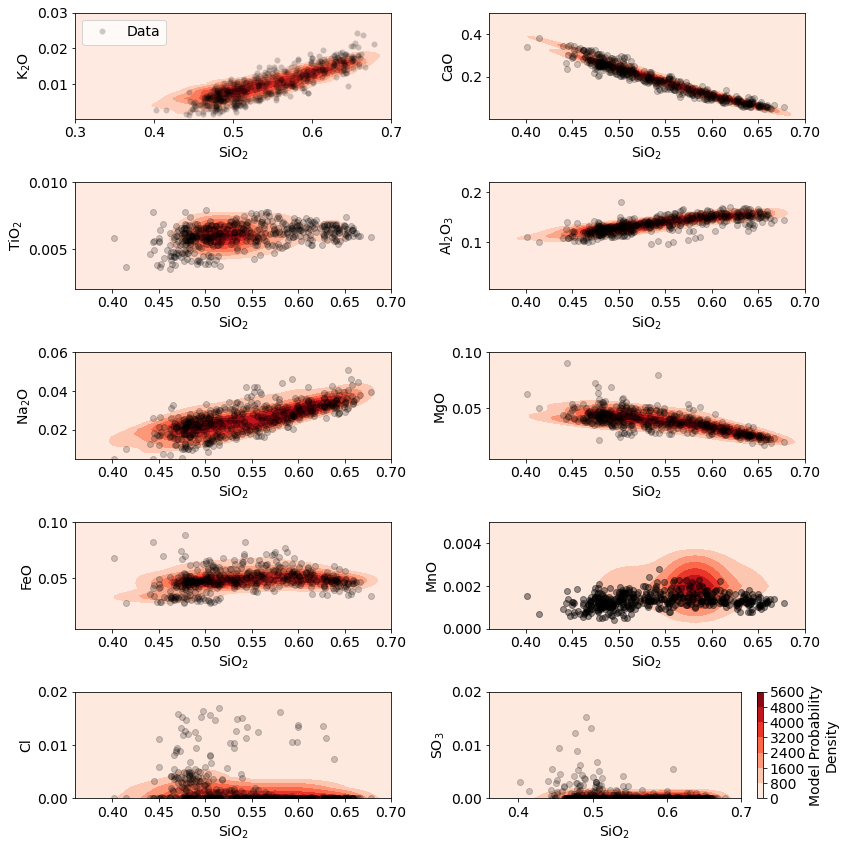

In [250]:
fig, ax  = plt.subplots(5, 2, figsize = (12,12))

cfset = ax[0,0].contourf(xx, yy, f_k2O, cmap = 'Reds')
ax[0,0].set_xlabel('SiO$_{2}$')
ax[0,0].set_ylabel('K$_{2}$O')
ax[0,0].set_xlim(0.3, 0.7)
ax[0,0].set_ylim(0.0002, 0.03)
ax[0,0].plot(data[:,3], data[:,0], 'o', alpha = 0.2, 
             markerfacecolor = 'k',
             markeredgecolor ='k',
             label = 'Data', 
            markeredgewidth = 0.0002)
ax[0,0].legend()

cfset = ax[0,1].contourf(xx, yy, f_caO, cmap = 'Reds')

ax[0,1].set_xlabel('SiO$_{2}$')
ax[0,1].set_ylabel('CaO')
ax[0,1].set_xlim(0.36, 0.7)
ax[0,1].set_ylim(0.0002, 0.5)
ax[0,1].plot(data[:,3], data[:,1], 'o', 
             alpha = 0.2, markerfacecolor = 'k',
             markeredgecolor ='k')


cfset = ax[1,0].contourf(xx, yy, f_tiO, cmap = 'Reds')

ax[1,0].set_xlabel('SiO$_{2}$')
ax[1,0].set_ylabel('TiO$_{2}$')
ax[1,0].set_xlim(0.36, 0.7)
ax[1,0].set_ylim(0.002, 0.01)
ax[1,0].plot(data[:,3], data[:,2], 'o', 
             alpha = 0.2, markerfacecolor = 'k',
             markeredgecolor ='k')


cfset = ax[1,1].contourf(xx, yy, f_alO, cmap = 'Reds')

ax[1,1].set_xlabel('SiO$_{2}$')
ax[1,1].set_ylabel('Al$_{2}$O$_{3}$')
ax[1,1].set_xlim(0.36, 0.7)
ax[1,1].set_ylim(0.005, 0.22)
ax[1,1].plot(data[:,3], data[:,4], 'o', 
             alpha = 0.2, markerfacecolor = 'k',
             markeredgecolor ='k')


cfset = ax[2,0].contourf(xx, yy, f_naO, cmap = 'Reds')

ax[2,0].set_xlabel('SiO$_{2}$')
ax[2,0].set_ylabel('Na$_{2}$O')
ax[2,0].set_xlim(0.36, 0.7)
ax[2,0].set_ylim(0.005, 0.06)
ax[2,0].plot(data[:,3], data[:,5], 'o', 
             alpha = 0.2, markerfacecolor = 'k',
             markeredgecolor ='k')


cfset = ax[2,1].contourf(xx, yy, f_mgO, cmap = 'Reds')

ax[2,1].set_xlabel('SiO$_{2}$')
ax[2,1].set_ylabel('MgO')
ax[2,1].set_xlim(0.36, 0.7)
ax[2,1].set_ylim(0.005, 0.1)
ax[2,1].plot(data[:,3], data[:,6], 'o', 
             alpha = 0.2, markerfacecolor = 'k',
             markeredgecolor ='k')


cfset = ax[3,0].contourf(xx, yy, f_feO, cmap ='Reds')

ax[3,0].set_xlabel('SiO$_{2}$')
ax[3,0].set_ylabel('FeO')
ax[3,0].set_xlim(0.36, 0.7)
ax[3,0].set_ylim(0.005, 0.1)
ax[3,0].plot(data[:,3], data[:,7], 'o', 
             alpha = 0.2, markerfacecolor = 'k',
             markeredgecolor ='k')


cfset = ax[3,1].contourf(xx, yy, f_mnO, cmap = 'Reds')

ax[3,1].set_xlabel('SiO$_{2}$')
ax[3,1].set_ylabel('MnO')
ax[3,1].set_xlim(0.36, 0.7)
ax[3,1].set_ylim(0, 0.005)
ax[3,1].plot(data[:,3], data[:,8], 'o', 
             alpha = 0.4, markerfacecolor = 'k',
             markeredgecolor ='k')


cfset = ax[4,0].contourf(xx, yy, f_cl, cmap = 'Reds')

ax[4,0].set_xlabel('SiO$_{2}$')
ax[4,0].set_ylabel('Cl')
ax[4,0].set_xlim(0.36, 0.7)
ax[4,0].set_ylim(0, 0.02)
ax[4,0].plot(data[:,3], data[:,9], 'o', 
             alpha = 0.2, markerfacecolor = 'k',
             markeredgecolor ='k')


cfset = ax[4,1].contourf(xx, yy, f_sO, cmap = 'Reds')

ax[4,1].set_xlabel('SiO$_{2}$')
ax[4,1].set_ylabel('SO$_{3}$')
ax[4,1].set_xlim(0.36, 0.7)
ax[4,1].set_ylim(0, 0.02)
ax[4,1].plot(data[:,3], data[:,10], 'o', 
             alpha = 0.2, markerfacecolor = 'k',
             markeredgecolor ='k')



fig.colorbar(cfset, label = 'Model Probability\nDensity'); 


plt.tight_layout()



In [251]:
qq_err_low,  qq_err_high = np.percentile(e[-1], 
                       [2.5, 97.5], 
                       axis = 1)

In [252]:
qq_err_low_1,  qq_err_high_1 = np.percentile(e[-1], 
                       [50 - 34, 50 + 34], 
                       axis = 1)

In [253]:
"""
"""
results = e[-1000:]

In [254]:
results[-1].mean(axis = 1)

array([0.00352107, 0.00636284, 0.00998623, 0.02104345, 0.43161284,
       0.15593043, 0.04481684, 0.03287168, 0.03282145, 0.26103316,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [255]:
"""
Gypsum/Anhydrite component
"""
from scipy.stats import truncnorm


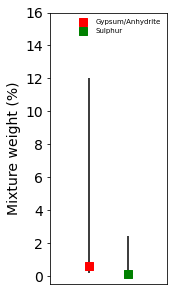

In [256]:
plt.figure(figsize = (2.1, 5))
plt.vlines(1, qq_err_low[6]*100, qq_err_high[6]*100, 
          color = 'k')
plt.scatter(1, y[sorted_indices][6]*100, 
            color = 'r',
           zorder = 10, marker = 's', 
           s = 50, 
           label = 'Gypsum/Anhydrite')

plt.vlines(2, qq_err_low[6]*20, qq_err_high[6]*20, 
          color = 'k')
plt.scatter(2, y[sorted_indices][6]*100 * 0.2, 
            color = 'g',
           zorder = 10, marker = 's', 
           s = 50, 
           label = 'Sulphur')

plt.ylabel('Mixture weight (%)')
plt.ylim(-0.5, 16)
plt.xlim(0, 3)
plt.xticks([])
plt.legend(fontsize = 7, frameon = False)

In [257]:
print(qq_err_low[6]*20, qq_err_high[6]*20, y[sorted_indices][6]*100 * 0.2)

0.033227417371371 2.404261264427168 0.12024048096192384


In [258]:
qq_err_low[sorted_indices][6]

1.0896465178922944e-10

In [259]:
qq_err_high[sorted_indices][6]*20

2.5074523812639447

In [260]:
"""
Overall weights for each component
"""
qq = e[-1].mean(axis = 1) 


"""
Sort Components
"""
sorted_indices = np.argsort(qq)[::-1]

In [261]:
qq_sort = qq[sorted_indices]
qq_sort_ = qq_sort[:K_m]

In [262]:
qq_err_low_sort = qq_err_low[sorted_indices]
qq_err_high_sort = qq_err_high[sorted_indices]

In [263]:
qq_err_low_sort_1 = qq_err_low_1[sorted_indices]
qq_err_high_sort_1 = qq_err_high_1[sorted_indices]

In [264]:
qq_err_high_sort[6]*0.2

0.02507452381263945

In [265]:
"""
Chixichlub impact 
 - 10x10^15 kg or one trillion metric tons

Volume of ejected Sulphur 
- Model estimate times this value
"""
mass_ejected_a = 120000000000000000 # Artemieva
fraction_volitized = 0.5
mass_ejected = mass_ejected_a * fraction_volitized
Sulphur_ejected_low = mass_ejected * qq_err_low_sort[6]*0.2
Sulphur_ejected_high = mass_ejected * qq_err_high_sort[6]*0.2
Sulphur_ejected_low1 = mass_ejected * qq_err_low_sort_1[6]*0.2
Sulphur_ejected_high1 = mass_ejected * qq_err_high_sort_1[6]*0.2
Sulphur_ejected_mean = mass_ejected * y[sorted_indices][6]*0.2


"""
Carbon Ejected
"""
mass_ejected_a = 120000000000000000 # Artemieva
fraction_volitized = 0.5
mass_ejected = mass_ejected_a * fraction_volitized
"""
Carbon part
"""
q_err_low_carbon = np.sqrt(qq_err_low_sort[2]**2 + qq_err_low_sort[8]**2)
q_err_high_carbon = np.sqrt(qq_err_high_sort[2]**2 + qq_err_high_sort[8]**2)
q_err_low_1_carbon = np.sqrt(qq_err_low_sort_1[2]**2 + qq_err_low_sort_1[8]**2)
q_err_high_1_carbon = np.sqrt(qq_err_high_sort_1[2]**2 + qq_err_high_sort_1[8]**2) 

Carbon_mass_mean = qq_sort_[2] + qq_sort_[8]

Carbon_ejected_low = mass_ejected * q_err_low_carbon*0.45
Carbon_ejected_high = mass_ejected * q_err_high_carbon*0.45
Carbon_ejected_low1 = mass_ejected * q_err_low_1_carbon *0.45
Carbon_ejected_high1 = mass_ejected * q_err_high_1_carbon*0.45
Carbon_ejected_mean = mass_ejected *Carbon_mass_mean*0.45



In [266]:
print(Carbon_ejected_low1/1000000000000, Carbon_ejected_high1/1000000000000)

398.2466625868768 7873.978850143085


In [267]:
print(Sulphur_ejected_low1/1000000000000, Sulphur_ejected_high1/1000000000000)

8.195915356938535 477.8521422289812


In [268]:
y[sorted_indices][6]

0.0060120240480961915

In [269]:
Carbon_mass_mean

0.16229327031693766

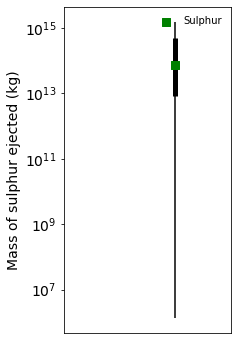

In [270]:
plt.figure(figsize = (3, 6))


plt.vlines(2, Sulphur_ejected_low, Sulphur_ejected_high, 
          color = 'k')

plt.vlines(2, Sulphur_ejected_low1, Sulphur_ejected_high1, 
          color = 'k', lw = 5)
plt.scatter(2, Sulphur_ejected_mean, 
            color = 'g',
           zorder = 10, marker = 's', 
           s = 50, 
           label = 'Sulphur')

plt.ylabel('Mass of sulphur ejected (kg)')
#plt.ylim(-0.5, 16)
plt.xlim(0, 3)
plt.xticks([])
plt.yscale('log')
plt.legend(fontsize = 10, frameon = False)

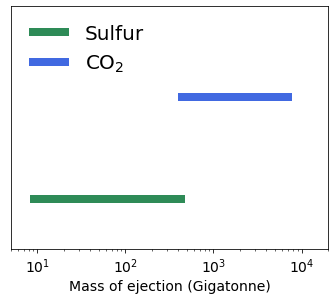

In [271]:
plt.figure(figsize = (5, 4.4))


#plt.hlines(1, xmin = Sulphur_ejected_low/1000000000000,
#           xmax = Sulphur_ejected_high/1000000000000, 
#          color = 'seagreen', 
#          lw = 3)
#
plt.hlines(1, xmin = Sulphur_ejected_low1/1000000000000, 
           xmax = Sulphur_ejected_high1/1000000000000,
          color = 'seagreen', lw = 8, 
          label = 'Sulfur')


#plt.hlines(2, xmin = Carbon_ejected_low/1000000000000,
#           xmax = Carbon_ejected_high/1000000000000, 
#          color = 'Royalblue', 
#          lw = 3)

plt.hlines(2, xmin = Carbon_ejected_low1/1000000000000, 
           xmax = Carbon_ejected_high1/1000000000000,
          color = 'Royalblue', lw = 8, 
          label = 'CO$_{2}$')

plt.xlabel('Mass of ejection (Gigatonne)')
plt.ylim(0.5, 2.9)
#plt.xlim(1, 3)
plt.yticks([])
plt.xscale('log')
plt.legend(fontsize = 20, frameon = False, 
          loc = 2)
plt.tight_layout()
plt.xlim(5, 20e3)


In [272]:
"""
Monte Carlo Approach
"""
samples = e[-50000:]

In [273]:
low_68, high_68 = np.percentile(samples, [50 - 34, 
                                           50 + 34], 
                                axis = 1)

In [274]:
samples[:,:,0].mean(axis = 0)*100

array([ 0.06772759,  1.14686222,  0.91904904,  0.92183812, 46.06918328,
       19.5304102 ,  5.83747667,  0.72930863,  2.24058851, 22.53755575,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [275]:
samples[:,:,0].std(axis = 0)*100

array([7.36173275e-14, 2.99413272e-13, 4.28997116e-13, 2.79290480e-14,
       3.66817687e-11, 8.18234369e-12, 5.81479309e-13, 3.15025783e-13,
       6.31786290e-13, 1.26676447e-11, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [276]:
mean_samples = samples.mean(axis = 1)
std_samples = samples.std(axis = 1)

In [278]:
n = 10000
q1 = np.zeros(n)
q2 = np.zeros(n)
q3 = np.zeros(n)
q4 = np.zeros(n)
q5 = np.zeros(n)
q6 = np.zeros(n)
q7 = np.zeros(n)
q8 = np.zeros(n)
q9 = np.zeros(n)
q10 = np.zeros(n)
for i in range(n):
    q1[i] = abs(np.random.normal(mean_samples[0], std_samples[0]))
    q2[i] = abs(np.random.normal(mean_samples[1], std_samples[1]))
    q3[i] = abs(np.random.normal(mean_samples[2], std_samples[2]))
    q4[i] = abs(np.random.normal(mean_samples[3], std_samples[3]))
    q5[i] = abs(np.random.normal(mean_samples[4], std_samples[4]))
    q6[i] = abs(np.random.normal(mean_samples[5], std_samples[5]))
    q7[i] = abs(np.random.normal(mean_samples[6], std_samples[6]))
    q8[i] = abs(np.random.normal(mean_samples[7], std_samples[7]))
    q9[i] = abs(np.random.normal(mean_samples[8], std_samples[8]))
    q10[i] = abs(np.random.normal(mean_samples[9], std_samples[9]))

ValueError: setting an array element with a sequence.

(array([    0.,     0.,     0.,     0.,     0., 10000.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

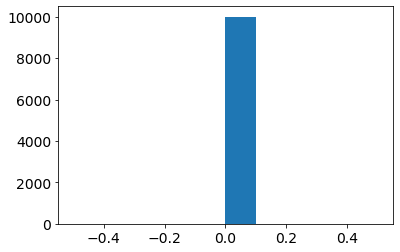

In [279]:
plt.hist(q9)

# Trace Plots

In [280]:
c[:,0, 9]

array([0.49758644, 0.49758644, 0.49758644, ..., 0.4987041 , 0.4987041 ,
       0.4987041 ])

In [294]:
n_ = 50000
c_trace = np.zeros(n_)
c_trace2 = np.zeros(n_)

for i in range(n_):
    c_trace[i] = c[:,0, 5][i]
    c_trace2[i] = c[:,0, 9][i]

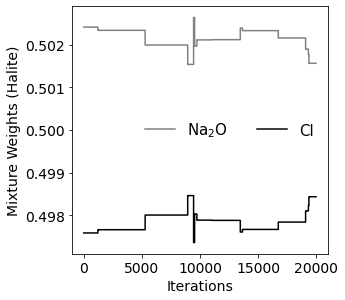

In [287]:
plt.figure(figsize = (5,4.4))
plt.plot(c_trace, ds = 'steps', 
        color= 'grey', 
        label = 'Na$_{2}$O');
plt.plot(c_trace2, ds = 'steps', 
        color= 'Black', 
        label = 'Cl');
plt.ylabel('Mixture Weights (Halite)')
plt.xlabel('Iterations')
plt.legend(loc = 5, ncol= 2, fontsize = 15, 
          frameon = False)
plt.tight_layout()
#plt.xscale('log')

In [288]:
"""
Autocorrelation
"""

def autocorrelation(data, lag):
    n = len(data); 
    mean = np.mean(data); 
    
    
    # Calculate the numerator (covariacnce)
    covariance = np.sum((data[:n - lag] - mean) * (data[lag:] - mean))
    
    # Variance 
    variance = np.sum((data - mean)**2)
    
    # Autocorrelation 
    autocorr = covariance / variance; 
    
    return autocorr

In [295]:
lag = 45000
result = autocorrelation(c_trace2, lag)

In [296]:
print(f"Autocorrelation at lag {lag}: {result}")


Autocorrelation at lag 45000: -0.08713385475823165


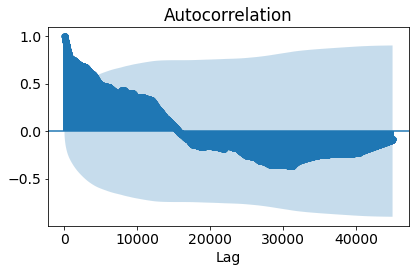

In [297]:
from statsmodels.graphics.tsaplots import plot_acf

# Sample time series data
data = np.array([4, 6, 8, 10, 12, 14, 16, 18, 20, 22])

# Plot the autocorrelation figure using statsmodels
fig, ax = plt.subplots()
plot_acf(c_trace, ax=ax, lags= 45000)
plt.xlabel("Lag")
plt.tight_layout()


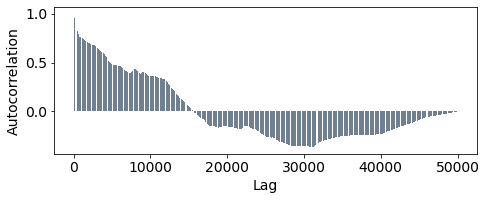

In [300]:
# Generate synthetic MCMC samples
np.random.seed(42)
samples = c_trace

def autocorrelation(data, max_lag):
    n = len(data)
    mean = np.mean(data)
    autocorrs = []

    for lag in range(1, max_lag + 1):
        covariance = np.sum((data[:n-lag] - mean) * (data[lag:] - mean))
        variance = np.sum((data - mean)**2)
        autocorr = covariance / variance
        autocorrs.append(autocorr)
    
    return autocorrs

# Calculate the autocorrelation values for the specified maximum lag
max_lag = 50000
autocorrs = autocorrelation(samples, max_lag)
autocorrs2 = autocorrelation(c_trace2, max_lag)

# Plot the autocorrelation figure
plt.figure(figsize = (7, 3))
plt.bar(range(1, max_lag + 1), autocorrs, 
       color = 'slategrey')

plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.tight_layout()

